# PRAKTIKUM 11
`Integral Numerik 2`

<hr style="border:2px solid black"> </hr>

# Tinjau Ulang Aturan Trapesium dan Kompositnya
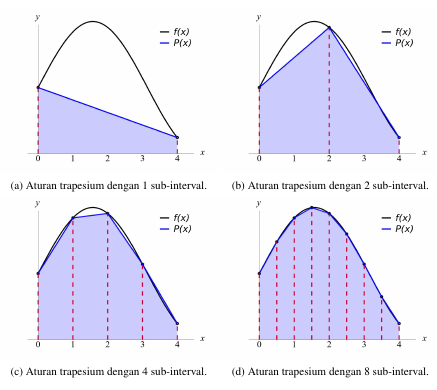
#### Apakah ada hubungannya?

## Aturan Rekursif Trapesium
Dimulai dengan $ T(0)=\frac{h}{2}(f(a)+f(b)) $, kemudian suatu barisam dari aturan trapesium $ \{ T(J) \} $ dapat dihasilkan oleh formula rekursif
\begin{equation}\label{eq:11 rekursif 2}
T(J)=\dfrac{T(J-1)}{2}+h\sum_{k=1}^{M}f(x_{2k-1}) \ \ \ \ \ \ \text{ untuk } J=1,2,\dots
\end{equation}
dengan $ h=(b-a)/2^J $ dan $ \{x_k=a+kh\} $.

In [ ]:
function rekursif(f,a,b,n)
  M = 1;
  h = b-a;
  T = Array{Float64}(undef,n+1,1)
  T[1] = h/2*(f(a)+f(b))
  for j = 1:n
    h = h/2;
    s = 0;
    for k = 1:M
      x = a+h*(2*k-1);
      s = s+f(x);
    end
    M = 2*M;
    T[j+1] = T[j]/2+h*s;
  end
  return T
end

### Contoh 1
Berikut merupakan langkah-langkah untuk menghitung nilai hampiran $ T(J) $ dengan $ J=0,1,2,...,5 $ dari $$  \int_{1}^{5}\,\dfrac{dx}{x}  $$ serta nilai galat dari masing-masing hampiran, jika diketahui nilai solusi eksak integral adalah $ 1.609437912 $ menggunakan aturan rekursif trapesium.

**Langkah 1**: Penghitungan nilai hampiran $ T(0) $ hingga $ T(5) $.

In [ ]:
f(x) = 1/x;
a = 1;
b = 5;
T = rekursif(f,a,b,5)

**Langkah 2**: Hitung nilai galat masing-masing hampiran

In [ ]:
eksak = 1.609437912;
galat = T.-eksak

## Aturan Rekursif Simpson dan Boole
Aturan Rekursif Simpson: $S(J)=\dfrac{4T(J)-T(J-1)}{3}$ untuk $J=1,2,\dots$

Aturan Rekursif Boole  : $B(J)=\dfrac{16S(J)-S(J-1)}{15}$ untuk $J=2,3,\dots$

### Contoh 2
Dengan aturan rekursif Simpson dan Boole, hitung nilai hampiran integral menggunakan rekursif Simpson yaitu $S(1)$ hingga $S(5)$ serta rekursif Boole yaitu $B(2)$ hingga $B(5)$ berdasarkan hasil aturan rekursif trapesium pada **Contoh 1**.

**Langkah 1**: Hitung nilai hampiran $S(1)$ hingga $S(5)$

In [ ]:
S = (4*T[2:end]-T[1:end-1])./3

**Langkah 2**: Hitung nilai hampiran $B(2)$ hingga $B(5)$

In [ ]:
B = (16*S[2:end]-S[1:end-1])./15

# Integral Romberg
Diberikan 2 hampiran $ R(2h,K-1) $ dan $ R(h,K-1) $ untuk nilai $ Q $ yang memenuhi persamaan
\begin{equation}\label{eq:11 romberg 1}
Q = R(h,K-1) + O(h^{2K})
\end{equation}
dan
\begin{equation}\label{eq:11 romberg 2}
Q = R(2h,K-1) + O(h^{2K})
\end{equation}
Dengan demikian, pengembangan hampiran tersebut adalah
\begin{equation}\label{eq:11 romberg 3}
Q = \dfrac{4^KR(h,K-1)-R(2h,K-1)}{4^K-1} + O(h^{2K+2})
\end{equation}

atau dalam bentuk lain dapat dituliskan sebagai berikut

$$ R(J,K) = R(J,K-1)+\dfrac{R(J,K-1)-R(J-1,K-1)
}{4^K-1} $$
dengan $ R(J,0) $ merupakan aturan rekursif trapesium.


\begin{align*}
&R(J,0)=T(J)&& \text{ untuk } J\ge 0 \text{, adalah barisan aturan rekursif trapesium}\\
&R(J,1)=S(J)&& \text{ untuk } J\ge 1 \text{, adalah barisan aturan rekursif Simpson}\\
&R(J,2)=B(J)&& \text{ untuk } J\ge 2 \text{, adalah barisan aturan rekursif Boole}
\end{align*}
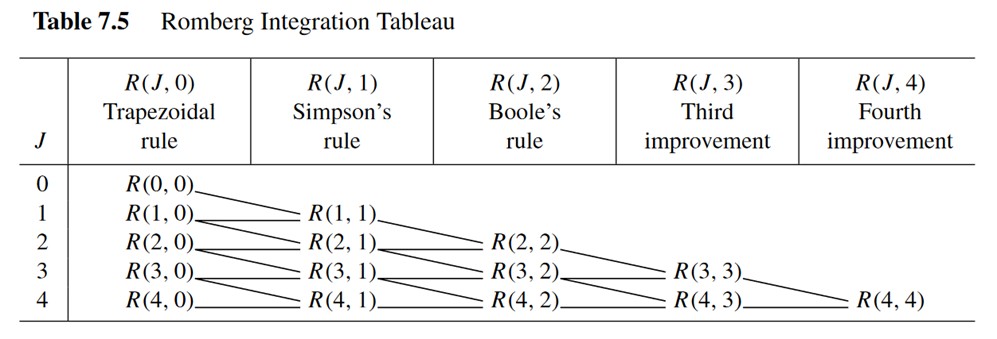

In [ ]:
# flag 0 artinya toleransi terpenuhi, flag 1 artinya toleransi tidak terpenuhi dan maksimum iterasi tercapai
function romberg(f, a, b; maxi = 10, delta = 10^-9)
  flag = 1;
  M = 1;
  h = b-a;
  err = 1;
  R = h/2*(f(a)+f(b));
  for J = 1:maxi
    # Rekursif Trapesium
    h = h/2;
    M = 2*M;
    s = 0;
    for p = 1:M/2
      x = a+h*(2*p-1);
      s = s+f(x);
    end
    R = [R zeros(size(R,1),1) ; R[J,1]/2 + h*s zeros(1,size(R,1))]
    # Aturan Romberg
    for K=1:J
      R[J+1,K+1]=R[J+1,K]+(R[J+1,K]-R[J,K])/(4^K-1);
    end
    err = abs.(R[J,J]-R[J+1,J+1]);
    if err<delta; flag=0; break; end
  end
  sol = R[end,end];
  return sol, flag, err, R
end

### Contoh 3
Diberikan fungsi 

$$  f(x) = (x^2+x+1)\cos(x)  $$

Berikut merupakan cara untuk menghitung nilai hampiran dari $ \displaystyle\int_{0}^{\pi/2}{f(x)}\,dx $ beserta lama waktu komputasi menggunakan metode Romberg (gunakan `BenchmarkTools` untuk menghitung waktu komputasi dan nilai $\delta=10^{-9}$ sebagai toleransi). 

In [ ]:
using BenchmarkTools

In [ ]:
f(x) = (x^2+x+1)*cos(x)
a = 0;
b = pi/2;
@btime sol, flag, err, R = romberg(f, a, b)
sol, flag, err, R = romberg(f, a, b)
@show (sol,flag,err) 
R

Berdasarkan hasil di atas, _flag_ bernilai 0, artinya solusi telah memenuhi nilai toleransi galat yang diberikan. Proses komputasi integral numerik dari $ \displaystyle\int_{0}^{\pi/2}{f(x)}\,dx $ menghasilkan solusi  2.038197427 dengan galat $ 1.213\times10^{-10} $ dalam waktu sekitar 150 mikrodetik. Waktu komputasi mungkin berbeda pada satu komputer dengan komputer lain, akan tetapi perbedaan waktu komputasi tidak akan berbeda signifikan.

# Aturan Kuadratur Adaptif
Aturan romberg memiliki waktu komputasi yang relatif lama untuk menghasilkan akurasi yang baik pada banyak kasus. Salah satu aturan yang dapat digunakan untuk mengatasinya adalah aturan kuadratur adaptif. Metode ini akan menyesuaikan
ukuran langkah $ h $ sesuai bentuk fungsi, sehingga menghemat waktu komputasi.

In [ ]:
function adaptif(f, a, b; delta=10^-9)
  iterating = 0;
  done = 1;
  SRvec = srule(f,a,b,delta);
  SRmat = SRvec;
  m = 1;
  state = iterating;
  while(state==iterating)
    n = m;
    for j = n:-1:1
      p = j;
      SR0vec = SRmat[p,:];
      err = SR0vec[5];
      delta = SR0vec[6];
      if (delta<=err)
        state=done;
        SR1vec=SR0vec;
        SR2vec=SR0vec;
        a = SR0vec[1];
        b = SR0vec[2];
        c =(a+b)/2;
        err=SR0vec[5];
        delta=SR0vec[6];
        delta2=delta/2;
        SR1vec=srule(f,a,c,delta2);
        SR2vec=srule(f,c,b,delta2);
        err = abs(SR0vec[3]-SR1vec[3]-SR2vec[3])/10;
        if err<delta
          SRmat[p,:]=SR0vec;
          SRmat[p,4]=SR1vec[3]+SR2vec[3];
          SRmat[p,5]=err;
        else
          SRmat = [SRmat; zeros(1,6)]
          SRmat[p+1:m+1,:] = SRmat[p:m,:];
          m=m+1;
          SRmat[p,:]=SR1vec;
          SRmat[p+1,:]=SR2vec;
          state=iterating;
        end
      end
    end
  end
  sol = sum(SRmat[:,4]);
  err = sum(abs.(SRmat[:,5]));
  SRmat = SRmat[1:m,[1,2,4,5,6]];
  return sol, err, SRmat
end
                    
function srule(f,a0,b0,delta0)
  h = (b0-a0)/2;
  C = zeros(1,3)
  C = f.([a0 (a0+b0)/2 b0]);
  S = h*(C[1]+4*C[2]+C[3])/3;
  S2= S;
  delta1=delta0;
  err=delta0;
  Z = [a0 b0 S S2 err delta1];
  return Z
end

### Contoh 4
Diberikan integral tentu 

$$ \int_{0}^{4}{13(x-x^2)e^{-3x/2}}\,dx  $$

Berikut merupakan langkah-langkah untuk menghitung integral di atas menggunakan aturan kuadratur adaptif dengan toleransi awal $ \epsilon=0.00001 $ dan menggambarkan pembagian selang $ [a_k,b_k] $.

**Langkah 1**: Hitung nilai hampiran integral dengan metode kuadratur adaptif.

In [ ]:
f(x) = 13*(x-x.^2).*exp(-3*x/2);
a = 0;
b = 4;
@btime sol,err,SRmat = adaptif(f,a,b,delta=0.00001)
sol,err,SRmat = adaptif(f,a,b,delta=0.00001)
@show sol
@show err
SRmat

**Langkah 2**: Gambarkan pembagian selang $ [a_k,b_k] $ metode kuadratur adaptif untuk fungsi $ f(x)=13(x-x^2)e^{-3x/2} $.

In [ ]:
using Plots

In [ ]:
x = [SRmat[:,1],b]
plt = plot(x,f,legend=:false)
scatter!(x,f)

<hr style="border:2px solid black"> </hr>

# Soal Latihan
Kerjakan soal berikut pada saat kegiatan praktikum berlangsung.

`Nama: ________`

`NIM: ________`

### Soal 1
Ulangi langkah-langkah pada **Contoh 1** untuk menghitung nilai $ T(J) $ untuk $ J=0,1,2,3,4,5 $ dari $$ \int_{0}^{\pi/2} (x^2+x+1)\cos(x) \,dx $$
Hitung pula nilai galat $ T(J) $, jika diketahui nilai solusi eksak integral adalah $ 2.038197427 $. 

### Soal 2
Ulangi langkah-langkah pada **Contoh 3** untuk menghitung nilai dari 

$$  \int_{0}^{2}{\sqrt{4x-x^2}}\,dx  $$ 

menggunakan integral Romberg hingga mendapatkan galat $ \epsilon = 10^{-10} $. Hitunglah waktu komputasi yang diperlukan menggunakan macro `@btime` pada `BenchmarkTools`.

**Catatan**. Hal ini akan memungkinkan untuk mengubah nilai `maxi` dan `delta` pada fungsi `romberg`. Perhatikan pula nilai galat dan _flag_ yang dihasilkan. Pastikan bahwa _flag_ bernilai 0. Jika _flag_ bernilai 1, kemungkinan besar dikarenakan nilai maksimum iterasi terlalu kecil, sehingga sesuaikan nilai `maxi` agar `flag` bernilai 0.

```julia
@btime sol1,flag,err1,R = romberg(f,a,b,maxi=100,delta=tol)
sol1,flag,err1,R = romberg(f,a,b,maxi=100,delta=tol)
@show (sol1,flag,err1)
```

### Soal 3
Diberikan fungsi 

$$ f(x)=\sqrt{4x-x^2} $$

Gunakan metode kuadratur adaptif dengan toleransi awal $ \epsilon=10^{-10} $ untuk menghitung solusi integral $ \int_{0}^{2}{f(x)}\,dx $, kemudian gambarkan pembagian selang $ [a_k,b_k] $ metode tersebut seperti pada **Contoh 4**. 

Hitunglah waktu komputasi yang diperlukan dengan paket `BenchmarkTools`. Bandingkan lama waktu komputasi yang diperlukan dengan soal latihan pada aturan Romberg.

```jl
@btime sol2,err2,SRmat = adaptif(f,a,b,delta=tol)
sol2,err2,SRmat = adaptif(f,a,b,delta=tol)
@show (sol2,err2)
```

### Soal 4
Ulangi soal 3 dan soal 4 dengan mengatur toleransi menjadi $\epsilon=10^{-13}$ dan $\epsilon=10^{-16}$.